<a href="https://colab.research.google.com/github/webdeeva/git_check/blob/master/Copy_of_Day_21_Lecture_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Day 21 Lecture 2 Solution

In this assignment, we will apply techniques for identifying and dealing with outliers to a dataset containing information about Uber rides.

In [0]:
%matplotlib qt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
uber_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/uber_rides.csv')

In [0]:
uber_data.head()

,trip_uid,trip_time,total_time,wait_time,price_rub,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed,cloudness
0,ee89076fd9da9bddf5f096b0ca42f8d5,0:21:33,0:29:00,0:07:27,265,5.17,9.29,12,12,0.69,4.81,0.78
1,518be51d403944a03c47e8d1f2c87311,0:19:27,0:26:00,0:06:33,255,4.97,9.93,10,10,0.70,6.53,0.66
2,6e460cc8a12c3c6568d0d4a67ac58393,1:06:53,1:23:00,0:16:07,644,13.01,18.01,14,14,0.61,5.25,0.86
3,49613a86a04e6c15d72b51d1a2935d81,0:13:37,0:20:00,0:06:23,1287,25.99,5.10,3,3,0.84,0.87,0.56
4,9896148fdecdb4c5d977a8691510bdb6,0:38:54,0:49:00,0:10:06,665,13.43,21.92,3,1,0.90,1.61,0.31


Before we identify outliers in the given columns, we need to address three time columns (trip_time, total_time, and wait_time), which are provided as formatted strings (HH:MM:SS) instead of numeric values. Convert the values in these three columns into their numeric equivalents in minutes - "2:15" should be converted to "2.25", "1:22:30" should be converted to "82.5", and so on. You may find it helpful to write a function that does this and use the .apply() function to apply it to all of the necessary columns.

In [0]:
def convert_to_minutes(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 60 + int(m) + round(int(s) / 60, 3)

In [0]:
time_cols = ['trip_time', 'total_time', 'wait_time']
uber_data[time_cols] = uber_data[time_cols].apply(lambda x: x.apply(lambda y: convert_to_minutes(y)))
uber_data.head()

,trip_uid,trip_time,total_time,wait_time,price_rub,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed,cloudness
0,ee89076fd9da9bddf5f096b0ca42f8d5,21.550,29.0,7.450,265,5.17,9.29,12,12,0.69,4.81,0.78
1,518be51d403944a03c47e8d1f2c87311,19.450,26.0,6.550,255,4.97,9.93,10,10,0.70,6.53,0.66
2,6e460cc8a12c3c6568d0d4a67ac58393,66.883,83.0,16.117,644,13.01,18.01,14,14,0.61,5.25,0.86
3,49613a86a04e6c15d72b51d1a2935d81,13.617,20.0,6.383,1287,25.99,5.10,3,3,0.84,0.87,0.56
4,9896148fdecdb4c5d977a8691510bdb6,38.900,49.0,10.100,665,13.43,21.92,3,1,0.90,1.61,0.31


Plot histograms for each of the column, excluding the trip ID. Which features appear to have outliers? What do you suspect the nature of these outliers is (i.e. do you think these are most likely data errors, or correct values that are simply unusually large or small?)

In [0]:
%matplotlib qt
hist = uber_data.drop('trip_uid', axis=1).hist()

Many of the features appear to have potential outliers. Wait_time, for example, has one data point that is clearly much larger than the rest, and the other time and price columns also have long tails and possibly outliers. However, the values in the outlier range/long tails still appear to be in the realm of reason and probably are not data errors.

Using Tukey's IQR method and a threshold value of 1.5, how many trips have trip_time values that are identified as outliers? Print these trips out.

In [0]:
col = 'trip_time'

q1, q3 = np.percentile(uber_data[col], [25, 75])
iqr = q3 - q1
lower_threshold = (q1 - 1.5 * iqr)
upper_threshold = (q3 + 1.5 * iqr)

print(f'Lower threshold for {col}: {lower_threshold}')
print(f'Upper threshold for {col}: {upper_threshold}')

outliers = uber_data[(uber_data[col] < lower_threshold) | (uber_data[col] > upper_threshold)]
print(f'Number of outliers identified: {outliers.shape[0]}')
outliers

Lower threshold for trip_time: -8.544624999999998
Upper threshold for trip_time: 47.486374999999995
Number of outliers identified: 30


,trip_uid,trip_time,total_time,wait_time,price_rub,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed,cloudness
2,6e460cc8a12c3c6568d0d4a67ac58393,66.883,83.0,16.117,644,13.01,18.01,14,14,0.61,5.25,0.86
13,36695e9088a840d3f7476e86294aa846,50.217,64.0,13.783,228,4.20,9.41,29,31,0.63,5.11,0.75
29,72801dd197d168a38ebaa88875492d60,68.067,88.0,19.933,1500,27.29,21.22,16,16,0.66,5.75,0.62
45,f981dcaa5c7120490cdd38357b78c79c,48.217,57.0,8.783,1800,33.55,19.14,15,15,0.41,5.95,0.46
47,e4004a6b46e6e1556f76f63f295a3f37,62.017,77.0,14.983,593,10.46,15.63,14,14,0.91,4.70,0.79
79,51785bfdf539132f5304a7ae1e1a6d9e,53.217,60.0,6.783,518,7.84,13.78,16,16,0.67,4.67,0.75
106,176e430aa7aafb4472cb09677d05fc2b,51.050,57.0,5.950,1000,15.43,36.50,9,6,0.65,4.82,0.31
108,22f1e9c384f584cf65c51555e5428703,85.317,103.0,17.683,1000,16.00,46.04,-3,-3,0.97,0.95,0.18
117,ab98f8918dff094689ae1657dadb6bbd,71.200,81.0,9.800,669,10.17,17.32,-2,-7,0.75,4.86,0.84
201,5383e6be5bc4f5edc74d2a22a422e30f,47.967,57.0,9.033,349,5.28,9.54,21,21,0.82,2.64,0.8


There are various ways of handling outliers, including "clipping" (also called "winsorizing"). Clip the outliers to the appropriate upper/lower threshold calculated as part of Tukey's method. Plot the histogram for trip_time after clipping; how does it look different?

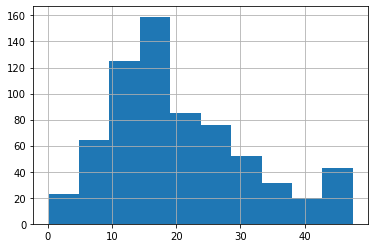

In [0]:
%matplotlib inline

uber_data.loc[(uber_data[col] > upper_threshold), 'trip_time'] = upper_threshold
uber_data.trip_time.hist()

We see that the long tail to the right is gone, and that there is now a small spike at the high end of the distribution that corresponds to the upper threshold we used for clipping.